# Enter Student Name & ID

In [1]:
student_id =  400101837 #@param {type:"integer"}
student_name = "Ali Kouchakzade" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


your student id: 400101837
your name: Ali Kouchakzade


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):
    m , n = X.shape

    X_mean = np.mean(X,axis=0) 
    X_var = np.std(X,axis=0) 
    X = (X - X_mean) / X_var

    cov_matrix = (X.T @ X) / (m - 1)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

    return X @ eigen_vectors[:,-num_components:] , eigen_vectors[:,-num_components:]

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

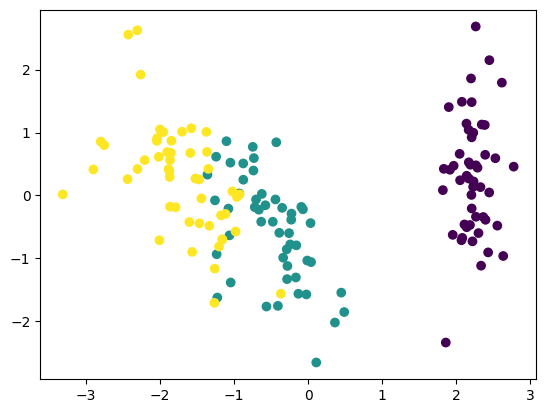

In [5]:
iris = load_iris()

X = iris.data

reduced_X ,_ = myPCA(X,2)

plt.scatter(reduced_X[:,1],reduced_X[:,0],c = iris.target)
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived using Principal Component Analysis (PCA) and represent the key features or components that characterize variations among different faces.

The eigenfaces are the principal components of the face images. PCA identifies the directions (eigenvectors) along which the variance in the data is maximized. In the context of face recognition, these directions correspond to the most significant features of the faces.

PCA reduces the dimensionality of the data while preserving the most significant features. Eigenfaces are used to represent the faces in this reduced-dimensional space.The eigenfaces are sorted by the amount of variance they capture from the original data. The first few eigenfaces capture the most significant features, while the remaining eigenfaces capture less important details.

### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [6]:
import os
import cv2


dataset_dir = './ORL/'
folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

X_train = []
y_train = []
X_test = []
y_test = []


for label, folder in enumerate(folders):
    folder_path = os.path.join(dataset_dir, folder)
    images = [img for img in os.listdir(folder_path) if img.endswith(('.bmp'))]
    images.sort() 

    for i, image_name in enumerate(images):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if i < 5:
            X_train.append(image)
            y_train.append(label)
        else:
            X_test.append(image)
            y_test.append(label)

X_train = np.array(X_train).reshape(200,-1)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(200,-1)
y_test = np.array(y_test)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [7]:
num_components = 44

X_train_reduced, param = myPCA(X_train, num_components)

X_test = (X_test - np.mean(X_test,axis=0)) / np.std(X_test, axis=0)
X_test_reduced = X_test  @ param

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [9]:
clf = LDA()
clf.fit(X_train_reduced, y_train)
y_test_predict = clf.predict(X_test_reduced)
accuracy_score(y_test, y_test_predict)

0.95

### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


maximum accuracy = 0.955 with number of features = 84


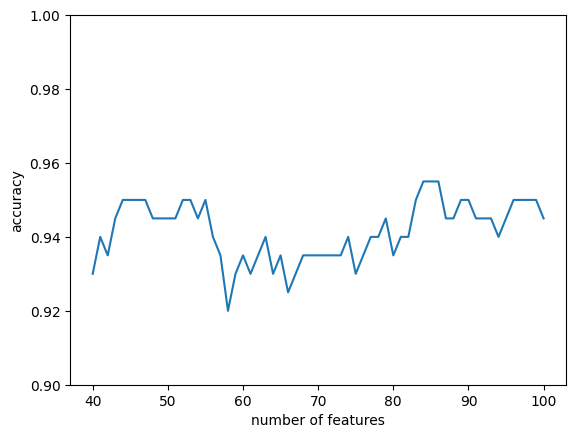

In [10]:
num_components_list , accuracy_list = [] , []
for num_components in range(40,101,1):
    X_train_reduced, param = myPCA(X_train, num_components)
    X_test_reduced = X_test  @ param
    
    clf = LDA()
    clf.fit(X_train_reduced, y_train)
    y_test_predict = clf.predict(X_test_reduced)
    num_components_list.append(num_components)
    accuracy_list.append(accuracy_score(y_test, y_test_predict))

max_indx = np.argmax(accuracy_list)
print(f'maximum accuracy = {accuracy_list[max_indx]} with number of features = {num_components_list[max_indx]}')
plt.plot(num_components_list, accuracy_list)
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.yticks([0.9 ,0.92 , 0.94 , 0.96 , 0.98 , 1])
plt.show()